## 목표:  3D 구현해보기


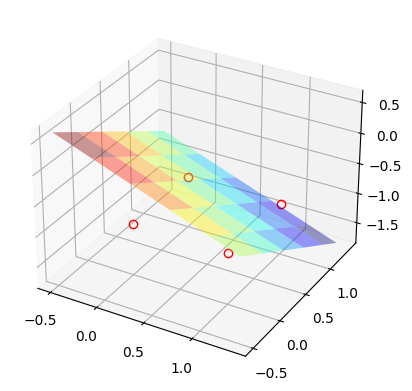

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0, 0, 1, 1]
y = [0, 1, 0, 1]
z = [-1, -1, -1, -1]

X = np.arange(-0.5, 1.5, 0.1)
Y = np.arange(-0.5, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (float(-5/7) * Y) + (float(-4/7) * X)

ax.plot(x, y, z, linestyle="none", marker="o", mfc="none", markeredgecolor="red")
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.jet)

plt.show()

In [27]:
import open3d as o3d


print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
print('b',pcd)
print('c',np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it
b PointCloud with 196133 points.
c [[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


In [28]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Downsample the point cloud with a voxel of 0.05


In [20]:
#모델 yolo4
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_rn18_y4'))
    

In [43]:
import cv2
image = cv2.imread('C:/Users/Leeyourack/jookyoung/image/1.test_image/peo3.jpg')
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
pred = model.detect_poses(image, skeleton='smpl_24')


(480, 640, 3)
(480, 640, 3)


In [44]:
print(pred['poses2d'].numpy()[0])

[[477.28558 333.70526]
 [462.95825 347.0124 ]
 [485.597   351.36313]
 [481.15625 315.19977]
 [440.81464 399.86603]
 [485.2369  410.00766]
 [484.8168  291.4809 ]
 [434.12354 466.02676]
 [473.83502 475.17828]
 [487.93732 285.24738]
 [421.05646 469.80743]
 [474.9002  480.66913]
 [499.60922 251.26497]
 [480.46613 260.32642]
 [508.28067 269.92236]
 [503.7499  246.89828]
 [464.81854 253.71223]
 [525.2334  275.10568]
 [433.22345 278.13995]
 [527.2137  318.19272]
 [447.2807  270.935  ]
 [520.37256 346.06726]
 [451.87143 267.91956]
 [518.72235 353.65097]]


In [41]:
import open3d as o3d


print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
a=pred['poses3d'].numpy()[0]
print('b',pcd)
print('c',np.asarray(pcd.points))
o3d.visualization.draw_geometries([a])

Load a ply point cloud, print it, and render it
b PointCloud with 196133 points.
c [[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[numpy.float64[3, 1]], up: numpy.ndarray[numpy.float64[3, 1]], front: numpy.ndarray[numpy.float64[3, 1]], zoom: float) -> None

Invoked with: [array([[ 955.2    ,  569.2    , 3732.8    ],
       [ 868.6    ,  650.2    , 3733.6    ],
       [1000.7    ,  673.1    , 3714.4    ],
       [ 971.8    ,  453.4    , 3705.6    ],
       [ 744.2    ,  984.7    , 3785.2    ],
       [ 998.7    , 1027.4    , 3713.6    ],
       [1009.7    ,  315.45   , 3764.8    ],
       [ 689.4    , 1365.2    , 3712.     ],
       [ 914.1    , 1396.8    , 3651.6    ],
       [1038.9    ,  279.9    , 3802.4    ],
       [ 632.2    , 1437.6    , 3844.4    ],
       [ 951.1    , 1477.     , 3772.     ],
       [1118.2    ,   70.06875, 3825.6    ],
       [1000.6    ,  126.675  , 3832.     ],
       [1158.     ,  183.925  , 3779.2    ],
       [1163.4    ,   43.6375 , 3891.2    ],
       [ 912.4    ,   86.2625 , 3871.6    ],
       [1255.8    ,  214.75   , 3761.6    ],
       [ 724.2    ,  243.9    , 3930.8    ],
       [1244.6    ,  469.4    , 3691.6    ],
       [ 853.3    ,  207.4    , 4120.4    ],
       [1241.     ,  654.75   , 3804.     ],
       [ 898.3    ,  190.25   , 4186.4    ],
       [1245.     ,  708.65   , 3846.4    ]], dtype=float32)]

[[[184 176 153]
  [183 175 152]
  [182 174 151]
  ...
  [102 102 102]
  [102 102 102]
  [102 102 102]]

 [[186 178 155]
  [185 177 154]
  [184 176 153]
  ...
  [103 103 103]
  [103 103 103]
  [102 102 102]]

 [[185 179 156]
  [185 179 156]
  [186 178 155]
  ...
  [104 104 104]
  [103 103 103]
  [102 102 102]]

 ...

 [[142 154 156]
  [137 149 151]
  [107 116 119]
  ...
  [  8   8   8]
  [ 11  11  11]
  [ 10  10  10]]

 [[132 144 148]
  [140 152 154]
  [114 123 126]
  ...
  [ 10  10  10]
  [  9   9   9]
  [ 10  10  10]]

 [[124 136 140]
  [141 152 156]
  [119 128 131]
  ...
  [ 11  11  11]
  [  5   5   5]
  [  9   9   9]]]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation, rc

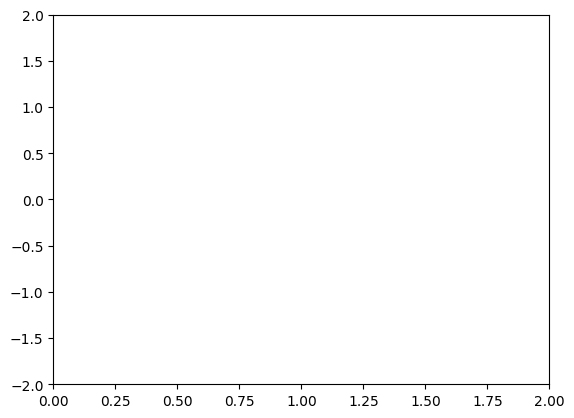

In [58]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [59]:
def init():
    line.set_data([], [])
    return (line,)

In [60]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [61]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [62]:
rc('animation', html='html5')
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

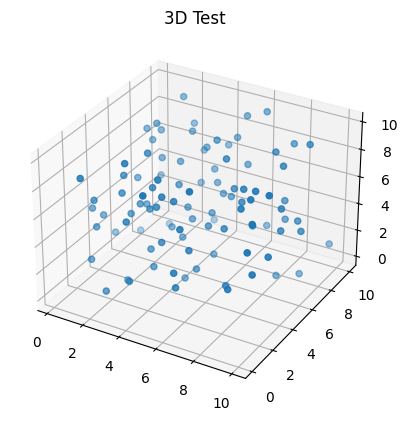

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)
plt.show()

In [56]:
from IPython.display import HTML

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 19, interval=400, blit=False)
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

c:\Users\Leeyourack\jookyoung\metrabs\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


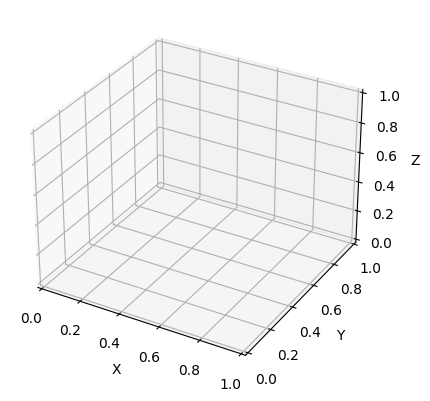

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

C:\Users\Leeyourack\AppData\Local\Temp\ipykernel_652\749751667.py:36: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


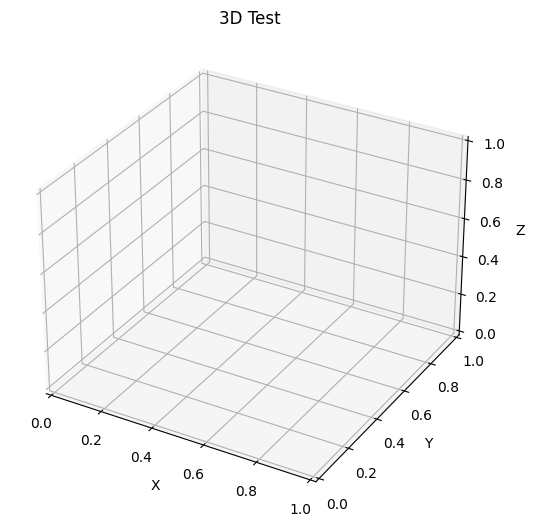

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

C:\Users\Leeyourack\AppData\Local\Temp\ipykernel_652\337429102.py:34: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


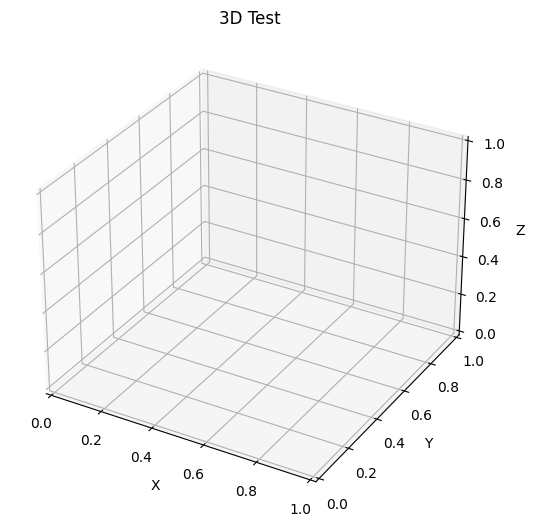

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def Gen_RandLine(length, dims=2) :
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length) :
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index-1] + step

    return lineData

def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2,:num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                              interval=50, blit=False)

plt.show()

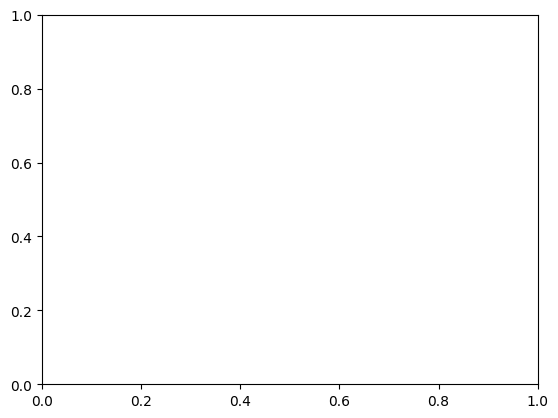

In [78]:
import matplotlib.pyplot as plt
from celluloid import Camera

fig, ax = plt.subplots()
camera = Camera(fig)



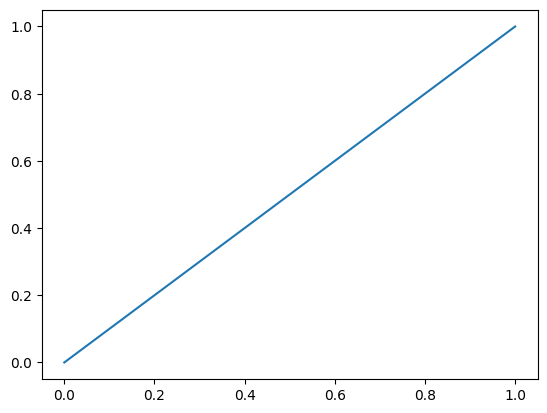

In [79]:
ax.plot([0, 1], [0, 1])
camera.snap()  # 애니메이션에 추가
fig



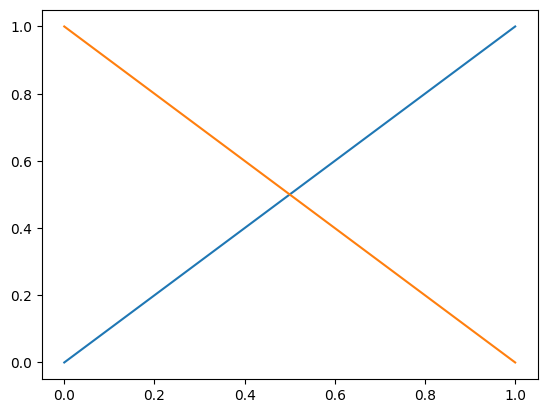

In [80]:
ax.plot([0, 1], [1, 0])
camera.snap()
fig

In [81]:
animation = camera.animate(interval=500, repeat=True)

In [82]:
from IPython.display import HTML

In [84]:
HTML(animation.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available